In [1]:
import Experiment
from Experiment import match_experiments, plot_blur_removal
from Experiment import plot_exp

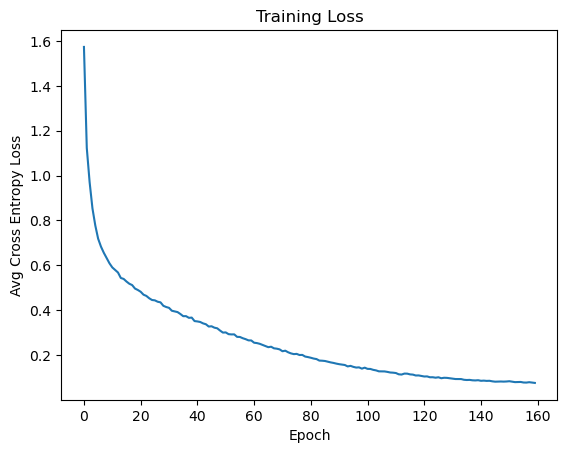

In [2]:
exp_parms = {
    'deficit_params' : {'start_epoch':0, 'end_epoch':0},
}

exp_ids = match_experiments(['WBN_Blur_6-5'], params = exp_parms)
id = exp_ids[0][0]
plot_exp('WBN_Blur_6-5', id)

In [3]:
#params = {}
params = {}

exp_ids = match_experiments(["WBN_Blur_6-5"], params=params)

In [4]:
print(exp_ids)

[('s4tnNUpy', 'WBN_Blur_6-5'), ('D8sVeX3M', 'WBN_Blur_6-5'), ('yqkG1OKu', 'WBN_Blur_6-5'), ('jFdXHqjf', 'WBN_Blur_6-5'), ('NHPSuv5n', 'WBN_Blur_6-5'), ('0PJi5SIO', 'WBN_Blur_6-5'), ('ROtc1JWc', 'WBN_Blur_6-5'), ('YZaLWuq0', 'WBN_Blur_6-5'), ('YpZuopp7', 'WBN_Blur_6-5'), ('tx0HJlIm', 'WBN_Blur_6-5'), ('9Ue5yvXP', 'WBN_Blur_6-5'), ('Yh84UrE0', 'WBN_Blur_6-5'), ('KVgq0nCw', 'WBN_Blur_6-5'), ('PXOyYC1d', 'WBN_Blur_6-5'), ('IBYiweqi', 'WBN_Blur_6-5'), ('lGTv0UBv', 'WBN_Blur_6-5'), ('XV6DNDCz', 'WBN_Blur_6-5'), ('wNvmCxV3', 'WBN_Blur_6-5'), ('KACy8nwo', 'WBN_Blur_6-5'), ('eQT9usDn', 'WBN_Blur_6-5'), ('j3oY2p58', 'WBN_Blur_6-5'), ('3iuNFyJy', 'WBN_Blur_6-5'), ('6rmERTxs', 'WBN_Blur_6-5'), ('KSdeR8oc', 'WBN_Blur_6-5'), ('QyELPyTf', 'WBN_Blur_6-5'), ('13OtM2AK', 'WBN_Blur_6-5'), ('GB2EqpUY', 'WBN_Blur_6-5'), ('fkAPUXQe', 'WBN_Blur_6-5'), ('k1ptfDxL', 'WBN_Blur_6-5'), ('SpdDq4qP', 'WBN_Blur_6-5'), ('rCav53Lw', 'WBN_Blur_6-5')]


Already plotted end epoch 0
Already plotted end epoch 10
Already plotted end epoch 20
Already plotted end epoch 40
Already plotted end epoch 60
Already plotted end epoch 80


<Axes: title={'center': 'AllCNN Blur Removal'}, xlabel='epoch', ylabel='accuracy'>

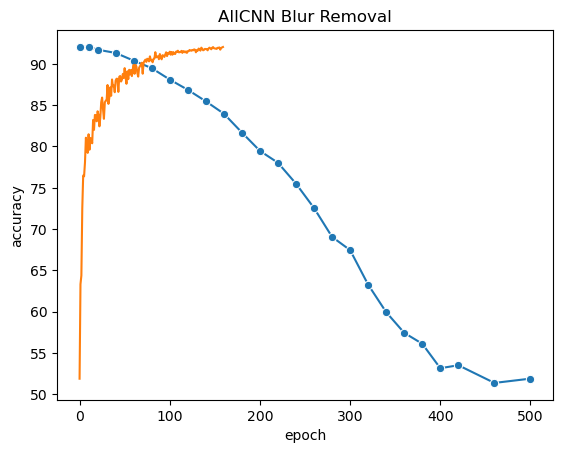

In [5]:
# this is a copy of the cell below

plot_blur_removal(exp_ids=exp_ids, title="AllCNN Blur Removal", filename='AllCNN_blur_removal_plot.png')

Already plotted end epoch 0
Already plotted end epoch 10
Already plotted end epoch 20
Already plotted end epoch 40
Already plotted end epoch 60
Already plotted end epoch 80


<Axes: title={'center': 'AllCNN Blur Removal'}, xlabel='epoch', ylabel='accuracy'>

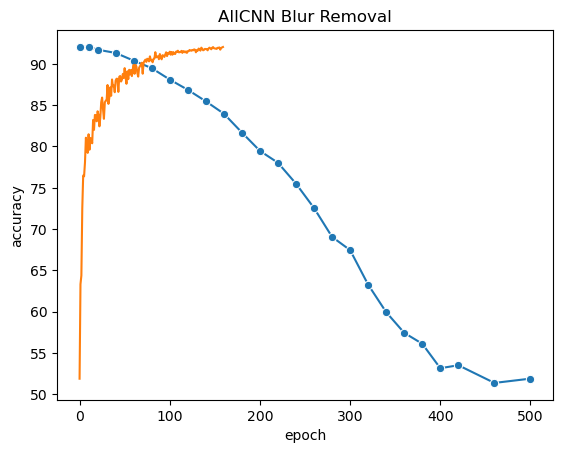

In [5]:
plot_blur_removal(exp_ids=exp_ids, title="AllCNN Blur Removal", filename='AllCNN_blur_removal_plot.png')

[('rCav53Lw', 'WBN_Blur_6-5')]


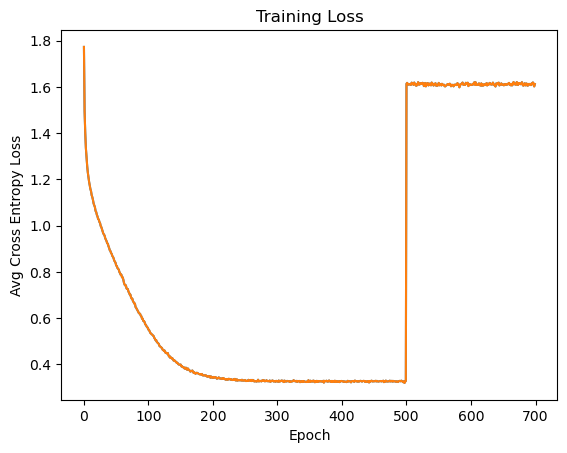

In [6]:
params2 = {'deficit_params': {'end_epoch': 500}}
exp_ids = match_experiments(["WBN_Blur_6-5"], params=params2)
print(exp_ids)
plot_exp(exp_ids[0][1], exp_ids[0][0])
Experiment.plot_exp(exp_ids[0][1], exp_ids[0][0])

In [7]:
from BlurModule import *
from Trial import get_datasets
from torchvision.transforms import v2

from torchvision.transforms import v2
import torchvision.transforms.v2.functional as F

class Invert(torch.nn.Module):
    def forward(self, x):
        return F.invert(x)

transform_train = v2.Compose([
    #v2.RandomCrop(32, padding=4),
    #v2.RandomHorizontalFlip(),
    v2.ToImage(),
    #Invert(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
])

transform_test = v2.Compose([
    v2.ToImage(),
    #Invert(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
])

trainset = torchvision.datasets.CIFAR10(root='../data', train=True, download=True, transform=transform_train)

testset = torchvision.datasets.CIFAR10(root='../data', train=False, download=True, transform=transform_test)

trans = BlurTransform(0, 2)
trans.set_epoch(1)

trainset[1]

img_ = trainset[1][0]

img_ = trans(img_)

In [8]:
imshow(img_)
print(img_.shape)

NameError: name 'imshow' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img_tensor, mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010], title=None):
    """
    Display a normalized PyTorch image tensor using matplotlib.
    
    Args:
        img_tensor: PyTorch tensor of shape (C, H, W), normalized
        mean: Channel-wise mean used for normalization
        std: Channel-wise std used for normalization
        title: Optional string to show as plot title
    """
    # Unnormalize
    mean = torch.tensor(mean).view(-1, 1, 1)
    std = torch.tensor(std).view(-1, 1, 1)
    img = img_tensor * std + mean

    # Clip to [0,1] range for valid imshow
    #img = torch.clamp(img, 0, 1)

    # Convert to HWC format and display
    plt.imshow(img.permute(1, 2, 0).cpu().numpy())
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()


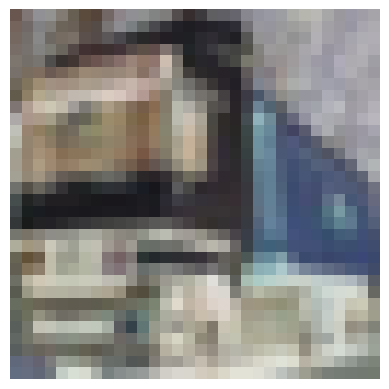

torch.Size([3, 32, 32])


In [ ]:
imshow(img_)
print(img_.shape)

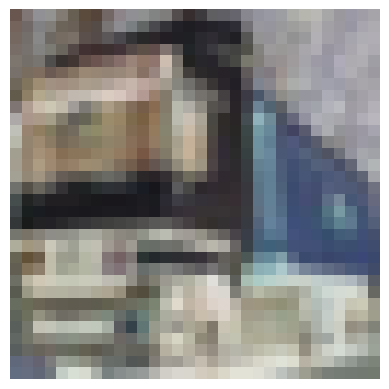

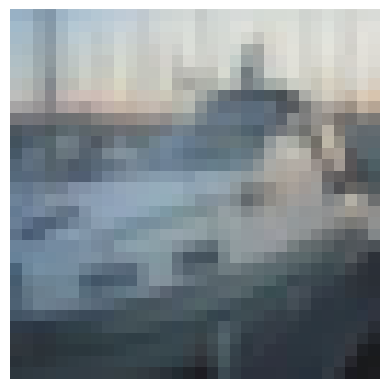

In [ ]:
imshow(trainset[1][0])
imshow(testset[2][0])